## Task : Iris Flower Classification

## Importing Necessary Libraries

In [71]:
import warnings as warn
warn.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,roc_auc_score,roc_curve,auc,classification_report

## Loading and Cleaning Dataset

In [2]:
!unzip '/content/archive (3).zip'

Archive:  /content/archive (3).zip
  inflating: IRIS.csv                


In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Exploratory Data Analysis

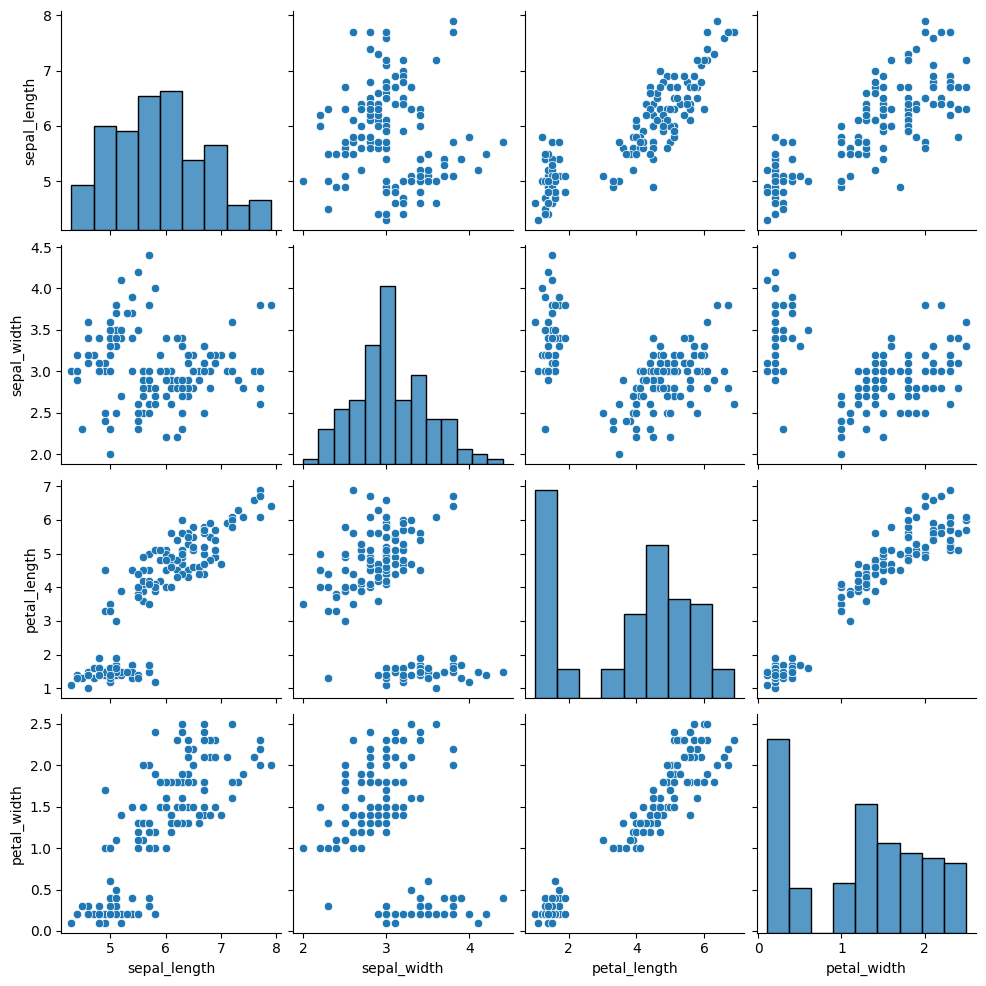

In [18]:
sns.pairplot(df)

<Axes: >

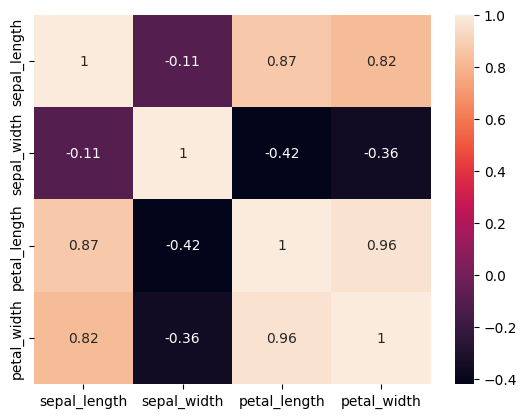

In [21]:
sns.heatmap(df.drop('species',axis=1).corr(),annot=True)

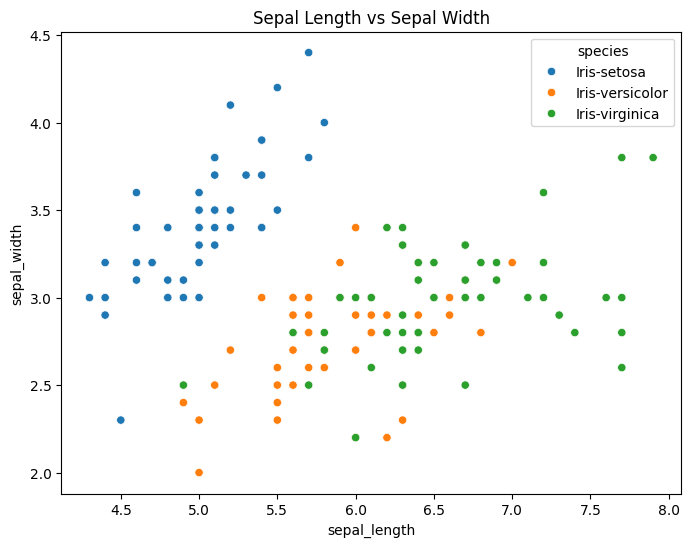

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

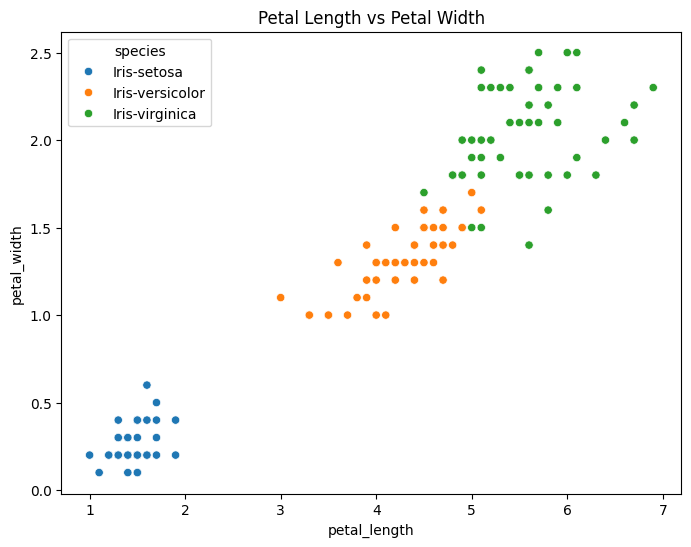

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Petal Length vs Petal Width')
plt.show()

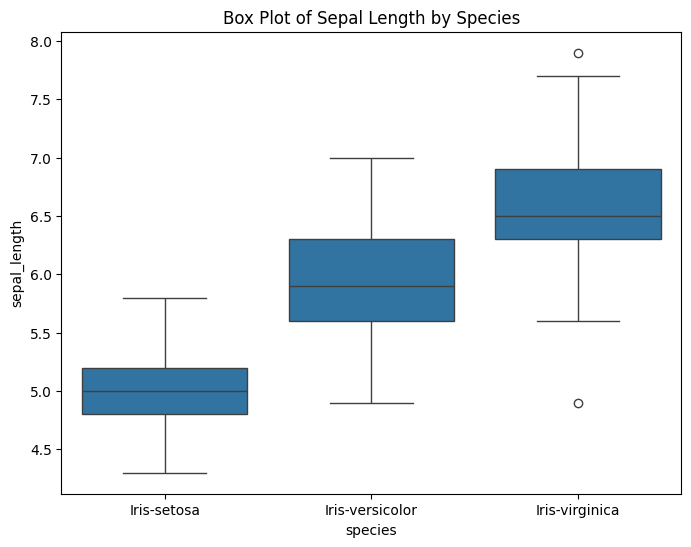

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

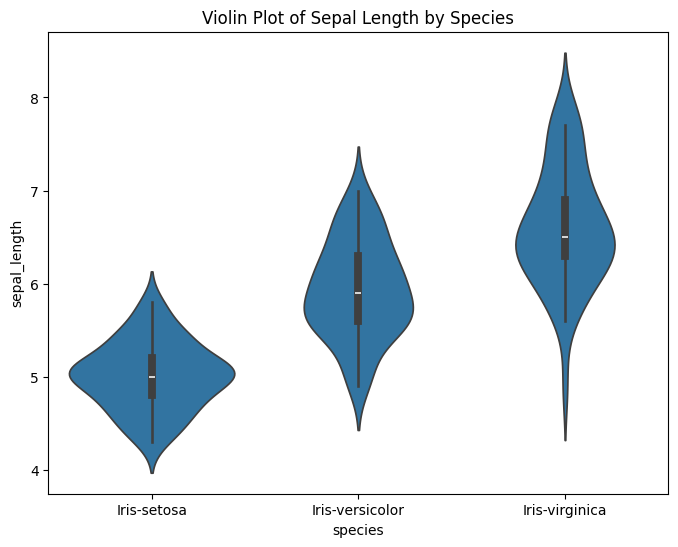

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='sepal_length', data=)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

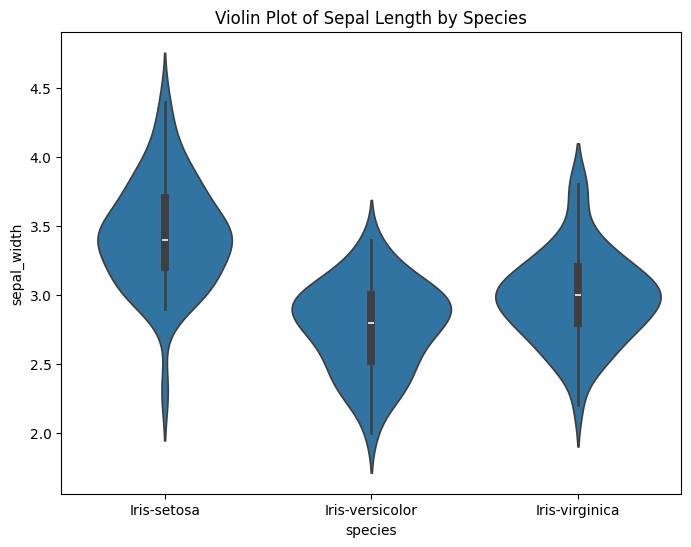

In [32]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='sepal_width', data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

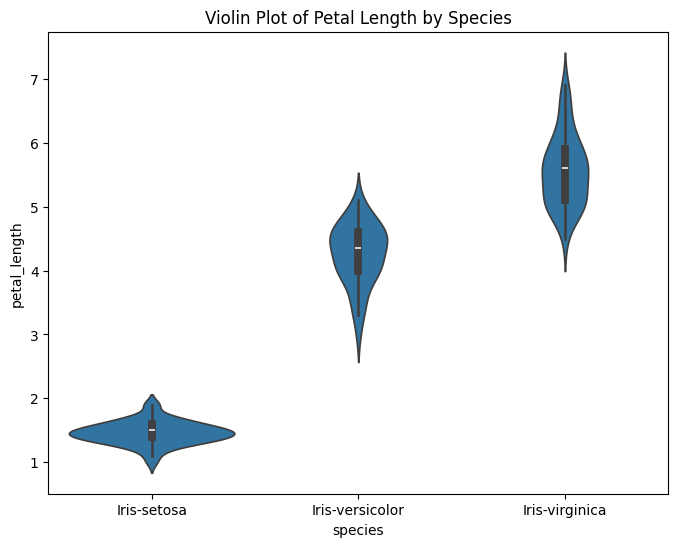

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_length', data=df)
plt.title('Violin Plot of Petal Length by Species')
plt.show()

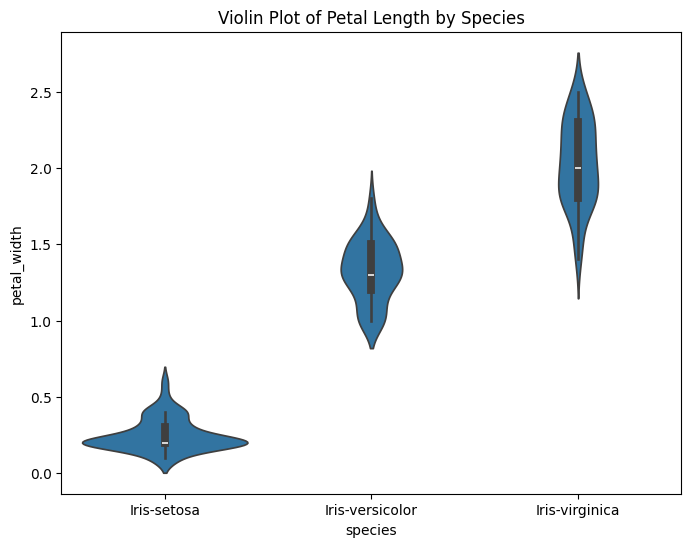

In [36]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_width', data=df)
plt.title('Violin Plot of Petal Length by Species')
plt.show()

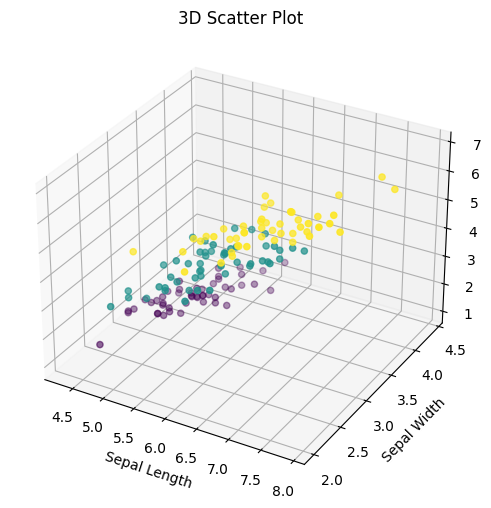

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot')
plt.show()


In [47]:
profile = ProfileReport(df, title="Profiling Report")

In [48]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [55]:
label_enc = LabelEncoder()
df['species'] = label_enc.fit_transform(df['species'])

In [56]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Building

In [59]:
x = df.drop('species',axis=1)
y = df['species']

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

### Modelling With Logistic Regression

In [75]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [76]:
accuracy_score(y_test,y_pred)

0.918918918918919

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.92      0.85      0.88        13

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



### Modelling With RandomForestClassifier

In [69]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred)

0.9459459459459459

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37

